In [106]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read in data

In [108]:
pathlist = Path('Data/').glob('**/*.csv')
data = []
for path in pathlist:
    path_in_str = str(path)
    data.append(pd.read_csv(path_in_str))
    data[-1]['source'] = path_in_str.split('\\')[1].split('_articles')[0]
    print(data[-1].head())
    print('-'*100)

   Unnamed: 0                                    ID             PublishedDate  \
0           0      DOI:10.1016/j.neurol.2020.04.004  2020-04-20T00:00:00.000Z   
1           1  DOI:10.1016/j.athoracsur.2020.04.007  2020-04-27T00:00:00.000Z   
2           2    DOI:10.1016/j.thromres.2020.04.024  2020-04-23T00:00:00.000Z   
3           3        DOI:10.1016/j.ekir.2020.04.001  2020-04-04T00:00:00.000Z   
4           4        DOI:10.1016/j.ando.2020.04.005  2020-04-21T00:00:00.000Z   

                                               Title  \
0  Guidance for the care of neuromuscular patient...   
1  Adult Cardiac Surgery and the COVID-19 Pandemi...   
2  Venous and arterial thromboembolic complicatio...   
3  Management of Patients on Dialysis and With Ki...   
4  Renin-angiotensin-aldosterone system and COVID...   

                  PublicationName             Creator  \
0              Revue Neurologique             G. Solé   
1  The Annals of Thoracic Surgery  Daniel T. Engelman   
2    

# Initial exploration data

In [109]:
[source.info() for source in data]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25 non-null     int64 
 1   ID               25 non-null     object
 2   PublishedDate    25 non-null     object
 3   Title            25 non-null     object
 4   PublicationName  25 non-null     object
 5   Creator          25 non-null     object
 6   Authors          25 non-null     object
 7   Link             25 non-null     object
 8   DOI              25 non-null     object
 9   Availability     25 non-null     object
 10  PII              25 non-null     object
 11  source           25 non-null     object
dtypes: int64(1), object(11)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     41 non-n

[None, None, None, None, None]

In [110]:
publ_per_source = pd.DataFrame(columns= ['source','nb_publ'])
for data_source in data:
    publ_per_source = publ_per_source.append({'source': data_source.source[0], 'nb_publ': len(data_source.index)}, ignore_index=True)

print(publ_per_source)

       source nb_publ
0    elsevier      25
1        emea      41
2        nejm      51
3      pubmed      10
4  the_lancet      43


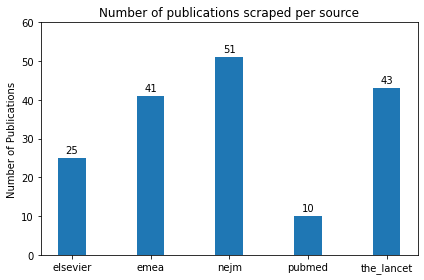

In [111]:
sources = publ_per_source.source
counts = publ_per_source.nb_publ

x = np.arange(len(sources))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, counts, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Publications')
ax.set_title('Number of publications scraped per source')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.set_ylim([0, 60])
# ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

# Entity Recognition with scispacy

## Source
https://github.com/maheshdosm/Bio-NER/blob/master/Medical_NER.ipynb

https://medium.com/@maheshdmahi/scispacy-for-bio-medical-named-entity-recognition-ner-63ed548f1df0

https://allenai.github.io/scispacy/

## Load the necessary packages

In [112]:
import scispacy
import spacy
import en_core_sci_sm   #The model we are going to use
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

## Define the model

In [113]:
nlp = spacy.load("en_core_sci_sm")   #Define the pre-trained model.

## Input

In [118]:
print(data[1].source[0])

emea


In [119]:
print(data[1].Abstract.head())

0    EMA endorsed a joint statement by the members ...
1    EMA provided an update on the measures EU auth...
2    EMA and the national competent authorities rem...
3    EMA announced that essential work to combat th...
4    EMA reminded patients and healthcare professio...
Name: Abstract, dtype: object


## Finding the sentences and entities in the texts

In [121]:
data[1]['sentences'] = data[1]['Abstract'].apply(lambda text: nlp(text))
data[1]['entities'] = data[1]['sentences'].apply(lambda sentences: sentences.ents)

In [122]:
#Select first abstract
abstract = data[1].iloc[0,-2]

In [123]:
#List the sentences of the first abstract
print(list(abstract.sents))

[EMA endorsed a joint statement by the members of the International Coalition of Medicines Regulatory Authorities (ICMRA)., The statement commits the international regulators to strengthen global collaboration to facilitate rapid development, approval and roll-out of safe and effective medicines against COVID-19.]


In [124]:
#Print the Medical or Clinical entities present in the first abstract
print(list(abstract.ents))

[EMA, endorsed, joint statement, members, International Coalition, Medicines Regulatory Authorities, ICMRA, statement commits, international regulators, global, collaboration, development, approval, roll-out, effective, medicines, COVID-19]


## Visualize

In [125]:
displacy.render(next(abstract.sents), style='dep', jupyter=True)

In [126]:
displacy.render(abstract, style="ent")

## Link abbreviations

In [61]:
# Add the abbreviation pipe to the spacy pipeline.
try:
    abbreviation_pipe = AbbreviationDetector(nlp)
    nlp.add_pipe(abbreviation_pipe)
except:
  print("AbbreviationDetector already exists")

AbbreviationDetector already exists


In [62]:
#Print the Abbreviation and it's definition
print("Abbreviation", "\t", "Definition")
for abstract in data[1]['sentences']:
    for abrv in abstract._.abbreviations:
        print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition
ICMRA 	 (17, 18) International Coalition of Medicines Regulatory Authorities
ICMRA 	 (86, 87) International Coalition of Medicines Regulatory Authorities
ICMRA 	 (33, 34) International Coalition of Medicines Regulatory Authorities
iSPOC 	 (83, 84) industry single point of contact
GMP 	 (33, 34) good manufacturing practice
GDP 	 (40, 41) good distribution practice
ICSRs 	 (81, 82) individual case safety reports
ICSRs 	 (53, 54) individual case safety reports
QPPV 	 (69, 70) qualified persons for pharmcovigilance
MedDRA 	 (98, 99) Medical Dictionary for Regulatory Activities
COVID-ETF 	 (13, 14) COVID-19 EMA pandemic Task Force
ICMRA 	 (30, 31) International Coalition of Medicines Regulatory Authorities
PMDA 	 (10, 11) Pharmaceuticals and Medical Devices Agency
ICMRA 	 (68, 69) International Coalition of Medicines Regulatory Authorities
ICMRA 	 (35, 36) International Coalition of Medicines Regulatory Authorities
ACE 	 (11, 12) angiotensin converting enzyme
ENCeP

In [63]:
linker = UmlsEntityLinker(resolve_abbreviations=True)
nlp.add_pipe(linker)

c:\python_3.7.4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\python_3.7.4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


ValueError: [E007] 'UmlsEntityLinker' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner', 'AbbreviationDetector', 'UmlsEntityLinker']

## Look at a random entitiy

In [127]:
# Let's look at a random entity!
entity = data[1]['entities'][0][0]

print("Name: ", entity)

Name:  EMA


In [128]:
# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
for umls_ent in entity._.umls_ents:
    print(linker.umls.cui_to_entity[umls_ent[0]])

In [129]:
for abstract in data[1]['entities']:
    for ent in abstract:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print('-'*50)

EMA 0 3 ENTITY
endorsed 4 12 ENTITY
joint statement 15 30 ENTITY
members 38 45 ENTITY
International Coalition 53 76 ENTITY
Medicines Regulatory Authorities 80 112 ENTITY
ICMRA 114 119 ENTITY
statement commits 126 143 ENTITY
international regulators 148 172 ENTITY
global 187 193 ENTITY
collaboration 194 207 ENTITY
development 228 239 ENTITY
approval 241 249 ENTITY
roll-out 254 262 ENTITY
effective 275 284 ENTITY
medicines 285 294 ENTITY
COVID-19 303 311 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
update 16 22 ENTITY
measures 30 38 ENTITY
EU 39 41 ENTITY
authorities 42 53 ENTITY
availability of 100 115 ENTITY
medicines 116 125 ENTITY
pandemic 137 145 ENTITY
meeting 159 166 ENTITY
EU 174 176 ENTITY
Group 196 201 ENTITY
Shortages 205 214 ENTITY
Medicines 218 227 ENTITY
Major Events 238 250 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
national competent authorities 12 42 ENTITY
patients 52 60 ENTITY
suspected 66 75 ENTITY
COVID-19 89 

certificates 100 112 ENTITY
applies 119 126 ENTITY
requests 153 161 ENTITY
certificates 166 178 ENTITY
COVID-19 190 198 ENTITY
pandemic 199 207 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
European Commission 9 28 ENTITY
Guidance 77 85 ENTITY
management 93 103 ENTITY
clinical trials 107 122 ENTITY
COVID-19 134 142 ENTITY
pandemic 157 165 ENTITY
safety 175 181 ENTITY
reporting 182 191 ENTITY
distribution 197 209 ENTITY
in-vitro 213 221 ENTITY
diagnostics 222 233 ENTITY
medical devices 235 250 ENTITY
updated guidance 269 285 ENTITY
changes 304 311 ENTITY
sections 321 329 ENTITY
communicating 348 361 ENTITY
authorities 367 378 ENTITY
consent 389 396 ENTITY
distribution 405 417 ENTITY
investigational medicines 421 446 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
advised 4 11 ENTITY
patients 12 20 ENTITY
healthcare professionals 25 49 ENTITY
angiotensin 55 66 ENTITY
ACE 86 89 ENTITY
inhibitors 91 101 ENTITY
angiotensin receptor blocker

regulatory network 23 41 ENTITY
measures 52 60 ENTITY
impact 86 92 ENTITY
outbreak 100 108 ENTITY
COVID-19 112 120 ENTITY
human 124 129 ENTITY
veterinary medicine supply 134 160 ENTITY
EU 175 177 ENTITY
working 193 200 ENTITY
pharmaceutical industry 206 229 ENTITY
associations 230 242 ENTITY
companies 244 253 ENTITY
manufacturers 258 271 ENTITY
EU 279 281 ENTITY
assess 285 291 ENTITY
resilience 296 306 ENTITY
supply chains 310 323 ENTITY
--------------------------------------------------
EMA 0 3 ENTITY
developers 15 25 ENTITY
potential 29 38 ENTITY
vaccines 39 47 ENTITY
treatments 51 61 ENTITY
coronavirus disease 72 91 ENTITY
COVID-19 93 101 ENTITY
Agency's 122 130 ENTITY
regulatory 131 141 ENTITY
speed 156 161 ENTITY
development 165 176 ENTITY
approval 181 189 ENTITY
EMA 205 208 ENTITY
evidence-generation 259 278 ENTITY
EMA 317 320 ENTITY
activated 325 334 ENTITY
managing 348 356 ENTITY
health threats 366 380 ENTITY
--------------------------------------------------


## Generate wordcloud

In [130]:
# Start with loading all necessary libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### From entities:

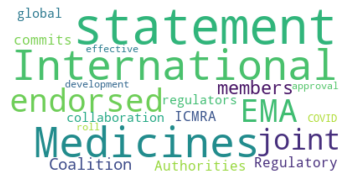

In [131]:
# Start with entities of first abstract:
text = ' '.join([str(ent) for ent in data[1]['entities'][0]]) 

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### From abstract:

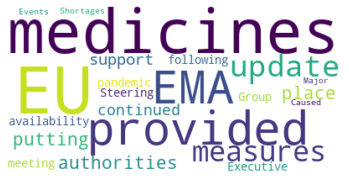

In [132]:
# Start with entities of first abstract:
text = data[1]['Abstract'][1]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### All abstracts from source:

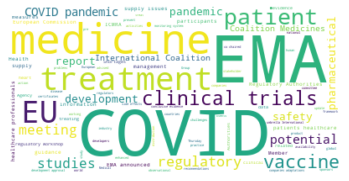

In [133]:
# Entities of first source:
text = ' '.join([str(ent) for ent in data[1]['entities']]) 

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", random_state=12).generate(text) #fix seed to 12

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save image
path = "wordclouds/"+data[0].source[0]+".png"
wordcloud.to_file(path)

### All sources:

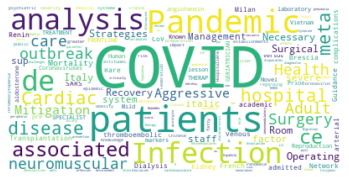

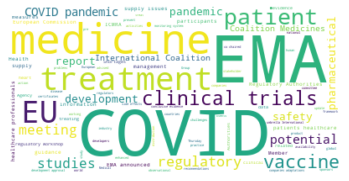

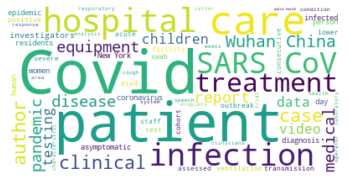

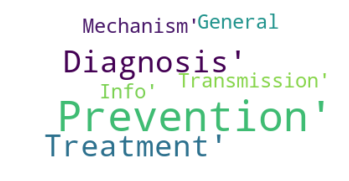

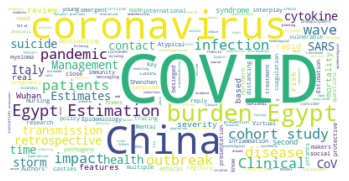

In [134]:
for data_source in data:
    if 'Abstract' in data_source:        
        data_source['sentences'] = data_source['Abstract'].apply(lambda text: nlp(text))
        data_source['entities'] = data_source['sentences'].apply(lambda sentences: sentences.ents)   
        
        # Entities of first source:
        text = ' '.join([str(ent) for ent in data_source['entities']]) 
    
    elif 'Topics' in data_source:
        # Entities of first source:
        text = ' '.join([str(ent) for ent in data_source['Topics']]) 
        
    elif 'Title' in data_source:
        # Entities of first source:
        text = ' '.join([str(ent) for ent in data_source['Title']]) 
    
    else:
        continue

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white", random_state=12).generate(text) #fix seed to 12

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    #save image
    path = "wordclouds/"+data_source.source[0]+".png"
    wordcloud.to_file(path)